## Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

**Answer:**

Deep Learning (DL) is a subset of Machine Learning (ML) that uses multi-layered neural networks to automatically learn hierarchical representations from data. It excels in tasks like image recognition, natural language processing, and speech synthesis.

**Evolution:**
- 1950s–1980s: Early neural networks like the Perceptron laid the foundation.
- 1990s–2000s: ML dominated with algorithms like SVMs, Decision Trees, and k-NN.
- 2010s–present: DL surged due to GPU acceleration, big data, and frameworks like TensorFlow and PyTorch.

**Key Differences:**

| Feature              | Traditional ML              | Deep Learning                  |
|----------------------|------------------------------|--------------------------------|
| Feature Engineering  | Manual                      | Automatic via layers           |
| Data Requirements    | Small to medium             | Large-scale                    |
| Model Complexity     | Shallow (1–2 layers)        | Deep (many layers)             |
| Interpretability     | Easier                      | Often opaque                   |
| Examples             | SVM, Decision Trees         | CNNs, RNNs, Transformers       |

---

## Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?

**Answer:**

A Perceptron is the simplest form of a neural network, consisting of:
- Inputs: Feature vector
- Weights: Assigned to each input
- Bias: A constant added to the weighted sum
- Activation Function: Typically a step function

**Working:**
The perceptron calculates a weighted sum of inputs plus bias. If the result exceeds a threshold, it outputs 1; otherwise, it outputs 0.

**Limitations:**
- Can only solve linearly separable problems.
- Fails on XOR and other non-linear datasets.
- Cannot model complex patterns without multiple layers.

---

## Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

**Answer:**

Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns beyond linear relationships.

**Comparison:**

| Function  | Output Range | Pros                          | Cons                          |
|-----------|--------------|-------------------------------|-------------------------------|
| Sigmoid   | 0 to 1       | Smooth, probabilistic output  | Vanishing gradient problem    |
| Tanh      | -1 to 1      | Zero-centered, stronger gradients | Still suffers vanishing gradient |
| ReLU      | 0 to infinity| Fast, sparse activation       | Dying ReLU problem            |

ReLU is most commonly used in hidden layers due to its simplicity and efficiency.

---

## Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.

**Answer:**

- Loss Function: Measures error for a single training example.
- Cost Function: Aggregates loss over the entire dataset.

**Analogy:**  
Loss is like the error for one student’s test; cost is the average error across the whole class.

**Examples:**
- Mean Squared Error (MSE): Measures squared difference between predicted and actual values.
- Binary Cross-Entropy: Measures error in binary classification tasks.

The cost function is typically the average of all individual losses.

---

## Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

**Answer:**

Optimizers adjust model parameters (weights and biases) to minimize the loss function during training.

**Comparison:**

| Optimizer       | Key Idea                              | Pros                          | Cons                          |
|-----------------|----------------------------------------|-------------------------------|-------------------------------|
| Gradient Descent| Moves in direction of steepest descent| Simple, widely used           | Slow convergence, sensitive to learning rate |
| RMSprop         | Uses moving average of squared gradients| Fast, good for RNNs           | May converge to local minima  |
| Adam            | Combines RMSprop and Momentum          | Adaptive, fast, widely used   | Slightly more memory usage    |

Adam is often preferred for deep learning due to its adaptive nature and robustness.


In [1]:
#Q6
import numpy as np

# Input and output for AND gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
lr = 0.1

# Activation function
def step(x):
    return 1 if x >= 0 else 0

# Training loop
for epoch in range(10):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        pred = step(z)
        error = y[i] - pred
        weights += lr * error * X[i]
        bias += lr * error

# Testing
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    print(f"Input: {X[i]}, Output: {step(z)}")


Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


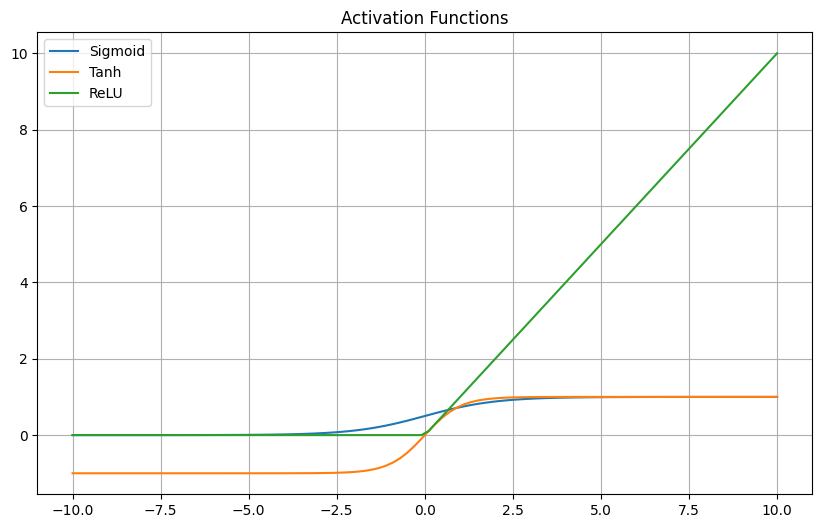

In [2]:
# Q7
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# Activation functions
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, tanh, label='Tanh')
plt.plot(x, relu, label='ReLU')
plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
#Q8
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Print accuracy
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8801 - loss: 0.4228
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9647 - loss: 0.1213
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0578
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9870 - loss: 0.0453
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.0876
Test Accuracy: 0.9758


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7821 - loss: 0.6270 - val_accuracy: 0.8452 - val_loss: 0.4350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8598 - loss: 0.3862 - val_accuracy: 0.8522 - val_loss: 0.4029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8743 - loss: 0.3478 - val_accuracy: 0.8702 - val_loss: 0.3651
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8840 - loss: 0.3144 - val_accuracy: 0.8619 - val_loss: 0.3762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8909 - loss: 0.2959 - val_accuracy: 0.8810 - val_loss: 0.3428


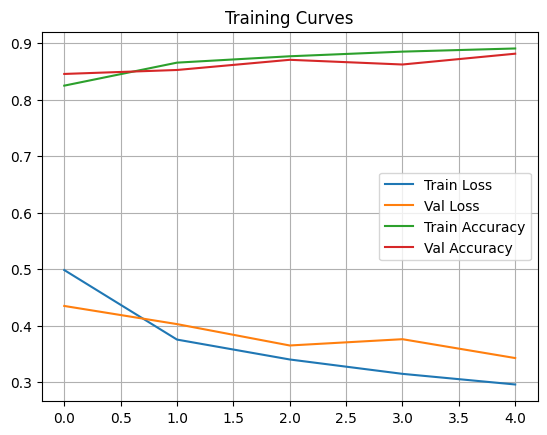

In [4]:
#Q9
from tensorflow.keras.datasets import fashion_mnist

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training Curves")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Q10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv("bank_fraud_example.csv")  # Replace with actual path
X = data.drop("label", axis=1)
y = data["label"]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Compute class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, class_weight=class_weights)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")
